In [1]:
import mne
import pathlib
import numpy as np

path = pathlib.Path("./data/chb01/")
# root = "data/chb01"
# raw_file = root / "sample_audvis_raw.fif"
# raw = mne.io.read_raw_fif(raw_file, verbose=False)

path

PosixPath('data/chb01')

In [2]:
raw = mne.io.read_raw_edf(path / "chb01_01.edf" , preload=True)
raw

Extracting EDF parameters from /home/weasel/reps/ai-seizure-detectives/data/chb01/chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


/tmp/ipykernel_6248/966433418.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(path / "chb01_01.edf" , preload=True)


<RawEDF | chb01_01.edf, 23 x 921600 (3600.0 s), ~161.7 MB, data loaded>

In [ ]:
raw.ch_names


['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

In [ ]:

layout = mne.channels.read_layout("EEG1005")

print(layout)
selection = [
    'Fp1',
    'F7',
    'T7',
    'P7',
    # 'FP1',
    'F3',
    'C3',
    'P3',
    'Fp2',
    'F4',
    'C4',
    'P4',
    # 'FP2',
    'F8',
    'T8',
    'P8',
    'Fz',
    'Cz',
    'P7',
    'T7',
    'FT9',
    'FT10',
    'T8'
]

import mne

# Define a list of your channel names
channel_names = ['FP1-F7', 'FP2-F8', 'C3-P3', 'C4-P4', 'Fz-Cz', 'F7-T7', 'F8-T8']
channel_names = raw.ch_names

# Create a mapping from your channel names to 10-20 electrode names
ch_mapping = {
    'FP1-F7' : 'Fp1',
    'F7-T7' : 'F7',
    'T7-P7' : 'T7',
    'P7-O1' : 'P7',
    'FP1-F3' : 'Fp1',
    'F3-C3' : 'F3',
    'C3-P3' : 'C3',
    'P3-O1' : 'P3',
    'FP2-F4' : 'Fp2',
    'F4-C4' : 'F4',
    'C4-P4' : 'C4',
    'P4-O2' : 'P4',
    'FP2-F8' : 'Fp2',
    'F8-T8' : 'F8',
    'T8-P8-0' : 'T8',
    'P8-O2' : 'P8',
    'FZ-CZ' : 'Fz',
    'CZ-PZ' : 'Cz',
    'P7-T7' : 'P7',
    'T7-FT9' : 'T7',
    'FT9-FT10' : 'FT9',
    'FT10-T8' : 'FT10',
    'T8-P8-1' : 'T8'
}



# Create a montage based on the mapping
montage = mne.channels.make_standard_montage('standard_1020')
# montage.ch_names = [mapping.get(ch, ch) for ch in montage.ch_names]
print([mapping.get(ch, ch) for ch in montage.ch_names])

# Apply the custom montage to your RawEDF object
# raw.set_montage(montage)


# selection = [s.capitalize() for s in selection]
# print(selection)
# picks = []
# for channel in selection:
#     picks.append(layout.names.index(channel))
# display = layout.plot(picks=picks)
# montage = mne.channels.make_standard_montage('standard_1020')

<Layout | EEG1005 - Channels: Fp1, Fpz, Fp2 ...>
['Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFz', 'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'T10', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO9', 'PO7', 'PO5', 'PO3', 'PO1', 'POz', 'PO2', 'PO4', 'PO6', 'PO8', 'PO10', 'O1', 'Oz', 'O2', 'O9', 'Iz', 'O10', 'T3', 'T5', 'T4', 'T6', 'M1', 'M2', 'A1', 'A2']


In [ ]:
[mapping[ch] for ch in raw.ch_names]


['Fp1',
 'F7',
 'T7',
 'P7',
 'Fp1',
 'F3',
 'C3',
 'P3',
 'Fp2',
 'F4',
 'C4',
 'P4',
 'Fp2',
 'F8',
 'T8',
 'P8',
 'Fz',
 'Cz',
 'P7',
 'T7',
 'FT9',
 'FT10',
 'T8']

In [ ]:
from mne.channels import read_custom_montage

# montage = read_custom_montage(path / 'chb01-summary.txt')  # Load your custom montage file
montage = mne.channels.make_standard_montage(kind='standard_1005')  # Replace 'your_kind' with the appropriate kind
# raw.set_montage(montage)

# raw.set_montage(path / 'chb01summary.txt')  # Apply the standard 10-20 system montage
# raw.plot()
montage.ch_names

print([c for c in selection if c not in montage.ch_names])
print(montage.ch_names)

[]
['Fp1', 'Fpz', 'Fp2', 'AF9', 'AF7', 'AF5', 'AF3', 'AF1', 'AFz', 'AF2', 'AF4', 'AF6', 'AF8', 'AF10', 'F9', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'F10', 'FT9', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T9', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'T10', 'TP9', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO9', 'PO7', 'PO5', 'PO3', 'PO1', 'POz', 'PO2', 'PO4', 'PO6', 'PO8', 'PO10', 'O1', 'Oz', 'O2', 'I1', 'Iz', 'I2', 'AFp9h', 'AFp7h', 'AFp5h', 'AFp3h', 'AFp1h', 'AFp2h', 'AFp4h', 'AFp6h', 'AFp8h', 'AFp10h', 'AFF9h', 'AFF7h', 'AFF5h', 'AFF3h', 'AFF1h', 'AFF2h', 'AFF4h', 'AFF6h', 'AFF8h', 'AFF10h', 'FFT9h', 'FFT7h', 'FFC5h', 'FFC3h', 'FFC1h', 'FFC2h', 'FFC4h', 'FFC6h', 'FFT8h', 'FFT10h', 'FTT9h', 'FTT7h', 'FCC5h', 'FCC3h', 'FCC1h', 'FCC2h', 'FCC4h', 'FCC6h', 'FTT8h', 'FTT10h', 'TTP9h', 'TTP7h', 'CCP5h', 'CCP3h', 'CCP1h', 'CCP2h', 'CCP4h',

In [16]:
ch_mapping = {
    'FP1-F7' : 'Fp1',
    'F7-T7' : 'F7',
    'T7-P7' : 'T7',
    'P7-O1' : 'P7',
    # 'FP1-F3' : 'Fp1',
    'F3-C3' : 'F3',
    'C3-P3' : 'C3',
    'P3-O1' : 'P3',
    'FP2-F4' : 'Fp2',
    'F4-C4' : 'F4',
    'C4-P4' : 'C4',
    'P4-O2' : 'P4',
    # 'FP2-F8' : 'Fp2',
    'F8-T8' : 'F8',
    'T8-P8-0' : 'T8',
    'P8-O2' : 'P8',
    'FZ-CZ' : 'Fz',
    'CZ-PZ' : 'Cz',
    # 'P7-T7' : 'P7',
    # 'T7-FT9' : 'T7',
    'FT9-FT10' : 'FT9',
    'FT10-T8' : 'FT10',
    # 'T8-P8-1' : 'T8'
}

# Form the 10-20 montage
mont1020 = mne.channels.make_standard_montage('standard_1020')
# Choose what channels you want to keep 
# Make sure that these channels exist e.g. T1 does not exist in the standard 10-20 EEG system!
kept_channels = [ch_mapping[ch] for ch in raw.ch_names]
ind = [i for (i, channel) in enumerate(mont1020.ch_names) if channel in kept_channels]
ind

mont1020_new = mont1020.copy()
# Keep only the desired channels
mont1020_new.ch_names = [mont1020.ch_names[x] for x in ind]
kept_channel_info = [mont1020.dig[x+3] for x in ind]
# Keep the first three rows as they are the fiducial points information
mont1020_new.dig = mont1020.dig[0:3]+kept_channel_info
# mont1020.plot()
mont1020_new.plot()
# kept_channel_info

KeyError: 'FP1-F3'

In [23]:
raw.drop_channels([ch for ch in raw.ch_names if ch not in ch_mapping.keys()])
raw.ch_names

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'FT9-FT10',
 'FT10-T8']

In [24]:
raw.rename_channels(ch_mapping)


<RawEDF | chb01_01.edf, 18 x 921600 (3600.0 s), ~126.6 MB, data loaded>

In [25]:
raw.set_montage(mont1020_new)

<RawEDF | chb01_01.edf, 18 x 921600 (3600.0 s), ~126.6 MB, data loaded>

In [26]:
raw.times

array([0.00000000e+00, 3.90625000e-03, 7.81250000e-03, ...,
       3.59998828e+03, 3.59999219e+03, 3.59999609e+03])

In [27]:
raw.ch_names

['Fp1',
 'F7',
 'T7',
 'P7',
 'F3',
 'C3',
 'P3',
 'Fp2',
 'F4',
 'C4',
 'P4',
 'F8',
 'T8',
 'P8',
 'Fz',
 'Cz',
 'FT9',
 'FT10']

In [29]:
# raw.copy().crop(1.0,3.0).get_data(start=1, stop=10, picks=['FP1-F7', 'F7-T7'])
raw.copy().crop(1.0,3.0).get_data(start=1, stop=10, picks=['Fp1', 'F7'])

array([[-5.66544567e-06,  2.53968254e-06,  6.05616606e-06,
         4.49328449e-06,  5.27472527e-06,  1.75824176e-06,
        -5.86080586e-07,  3.71184371e-06, -9.76800977e-07],
       [ 1.97313797e-05,  7.61904762e-06,  4.88400488e-06,
         1.15262515e-05,  5.66544567e-06,  1.50427350e-05,
         2.53968254e-06, -7.61904762e-06, -5.66544567e-06]])

In [30]:
ch, t = raw[:,10:12] # all channels at time id 10 and 11
print(ch) # one row per channel, 1 column per timestep
print(t) # a row with two timesteps

[[ 4.10256410e-06  3.71184371e-06]
 [-5.66544567e-06 -2.20757021e-05]
 [ 3.71184371e-06  1.30891331e-05]
 [-5.27472527e-06 -1.46520147e-05]
 [ 1.95360195e-07 -1.75824176e-06]
 [ 1.95360195e-07  1.36752137e-06]
 [-3.71184371e-06 -7.61904762e-06]
 [ 2.53968254e-06  2.93040293e-06]
 [-5.86080586e-07 -4.49328449e-06]
 [ 9.76800977e-07  2.14896215e-06]
 [ 2.83272283e-05  6.11477411e-05]
 [-1.85592186e-05 -3.45787546e-05]
 [-9.76800977e-07  2.93040293e-06]
 [ 3.77045177e-05  7.75579976e-05]
 [-1.36752137e-06 -8.00976801e-06]
 [-1.95360195e-07  1.36752137e-06]
 [-2.32478632e-05 -5.84126984e-05]
 [-5.86080586e-07  1.36752137e-06]]
[0.0390625  0.04296875]


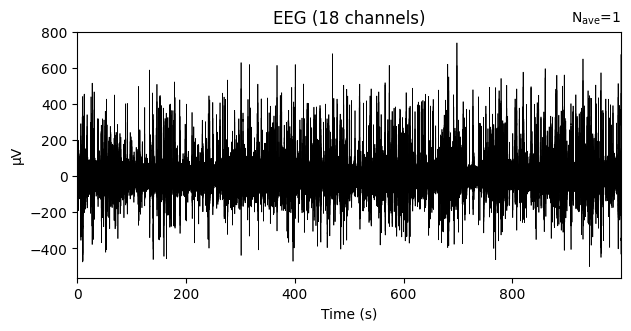

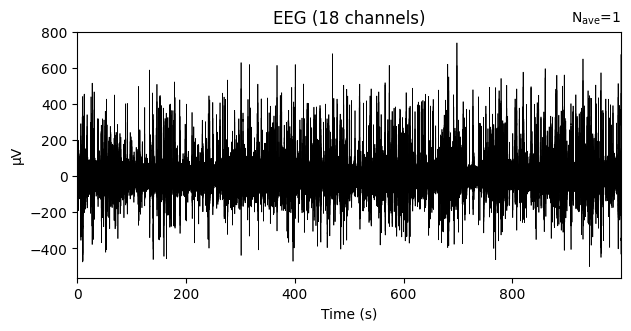

In [31]:
import mne
import numpy as np

# Load the raw EEG data from the .edf file
# raw = mne.io.read_raw_edf('your_eeg_data.edf', preload=True)

# Specify the time range you want to "average" (in seconds)
start_time = 0.0
end_time = 1000

# Extract the EEG data within the specified time range
# picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)
# data, times = raw[:, int(start_time * raw.info['sfreq']):int(end_time * raw.info['sfreq'])]
# data, times = raw[:, int(start_time * raw.info['sfreq']):int(end_time * raw.info['sfreq']), picks]

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)
start_idx = int(start_time * raw.info['sfreq'])
end_idx = int(end_time * raw.info['sfreq'])
sliced_data, times = raw.get_data(start=start_idx, stop=end_idx, picks=picks, return_times=True)

# Create a custom "Evoked"-like object
info = mne.create_info(ch_names=[raw.ch_names[pick] for pick in picks], sfreq=raw.info['sfreq'], ch_types='eeg')
evoked = mne.EvokedArray(sliced_data, info, tmin=start_time, comment='Custom Evoked-Like Object')

# Plot the "average" data as if it were an Evoked object
evoked.plot()


In [45]:
raw

<RawEDF | chb01_01.edf, 18 x 921600 (3600.0 s), ~126.6 MB, data loaded>

In [47]:
tmin = 0.0
tmax = 1000

# Create an Epochs object (assuming no events, so one large epoch)
events = mne.make_fixed_length_events(raw, id=1, start=0, stop=None, duration=tmax, first_samp=True)
epochs = mne.Epochs(raw, events=events, tmin=tmin, tmax=tmax, baseline=None, preload=True)
# Average the epochs to create an Evoked object
evoked = epochs.average()


Not setting metadata
3 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3 events and 256001 original time points ...
0 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


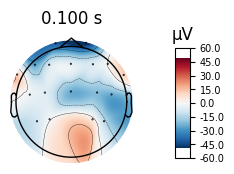

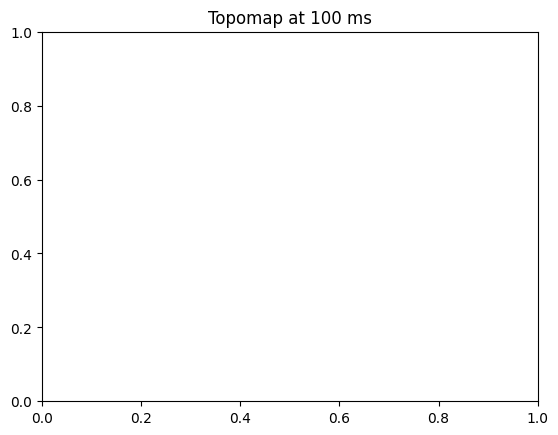

In [48]:
# Plot the topographical map for a specific time point (e.g., 100 ms)
# evoked.plot_topomap(times=0.1, title='Topomap at 100 ms', time_unit='s')
evoked.plot_topomap(times=0.1, time_unit='s')
import matplotlib.pyplot as plt
plt.title('Topomap at 100 ms')
plt.show()


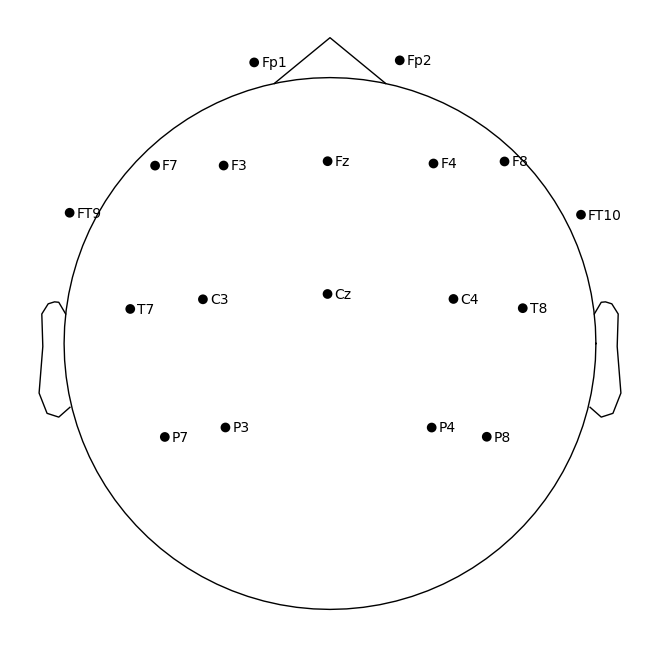

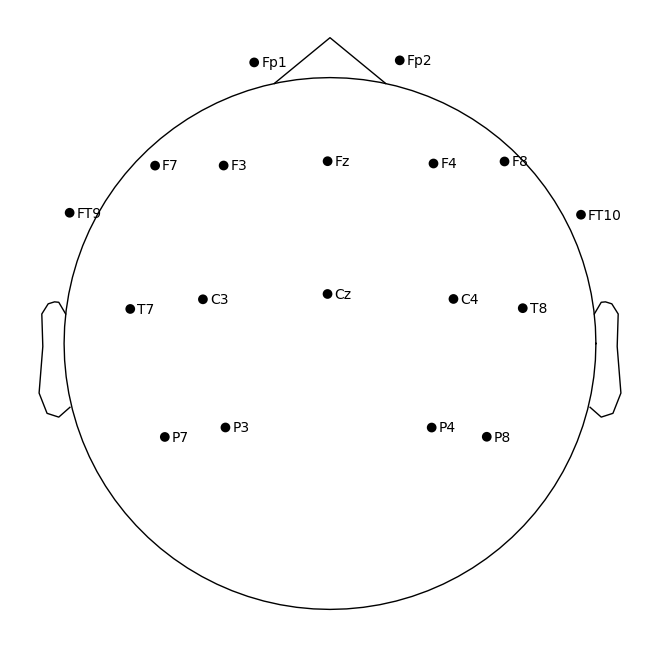

In [49]:
# Plot the channel locations
raw.plot_sensors(show_names=True)


Setting up low-pass filter at 40 Hz

IIR filter parameters
---------------------
Butterworth lowpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 40.00 Hz: -6.02 dB



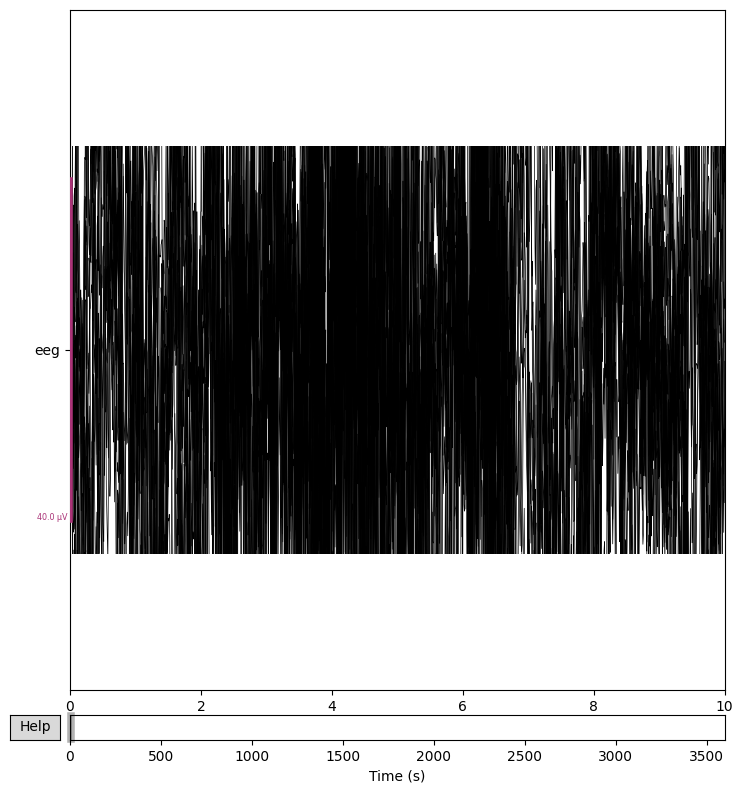

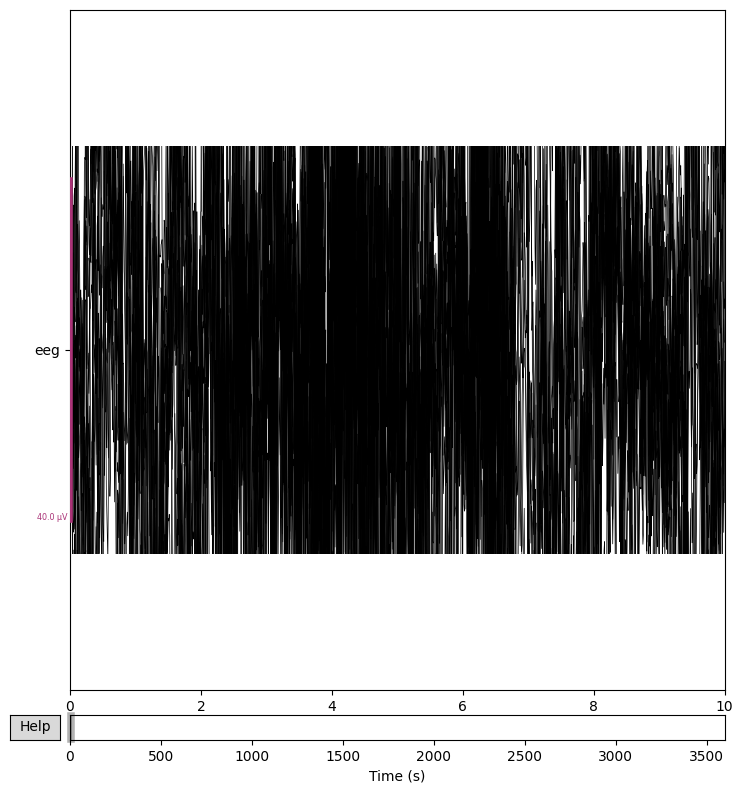

In [50]:
# Create a butterfly plot of the EEG data
raw.plot(butterfly=True, color='k', lowpass=40)


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


/home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


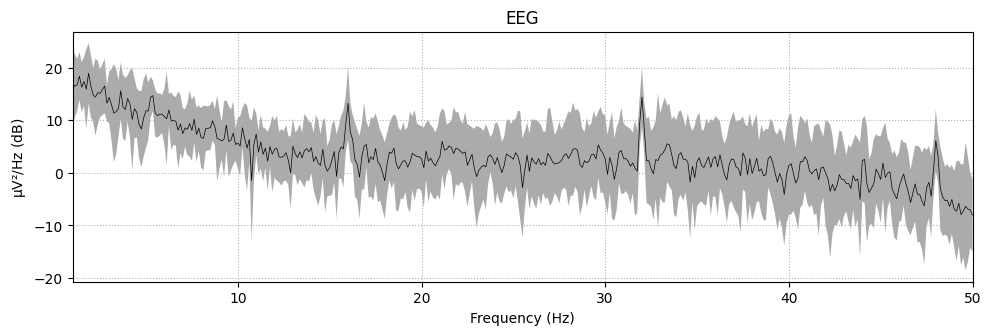

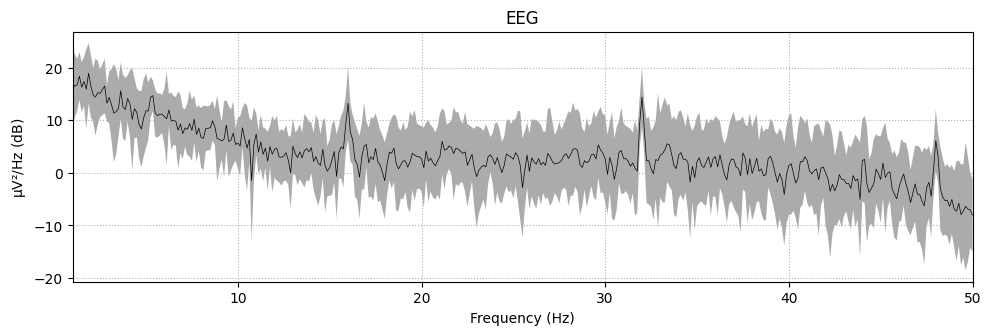

In [51]:
# Plot the power spectral density (PSD) for EEG data
raw.plot_psd(fmin=1, fmax=50, tmax=10, average=True, spatial_colors=False)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.3s


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Applying baseline correction (mode: logratio)


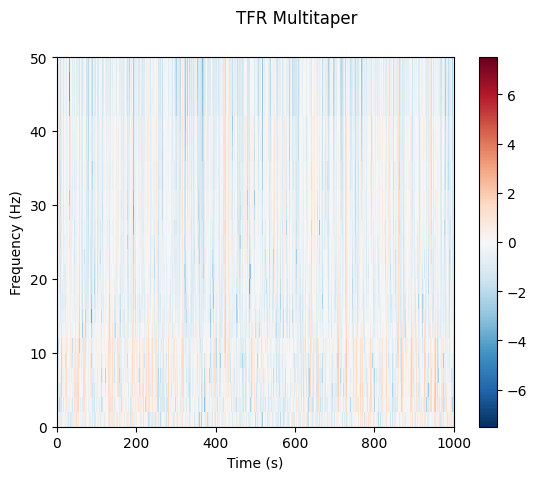

[<Figure size 640x480 with 2 Axes>]

In [52]:
from mne.time_frequency import tfr_multitaper

# Compute and plot time-frequency representation using multitaper method
freqs = np.arange(1, 50, 2)
tfr = tfr_multitaper(evoked, freqs=freqs, n_cycles=1, time_bandwidth=2, return_itc=False)
tfr.plot([0], baseline=(None, 0), mode='logratio', title='TFR Multitaper', yscale='auto')


Not setting metadata
3 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 3 events and 180 original time points ...
1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


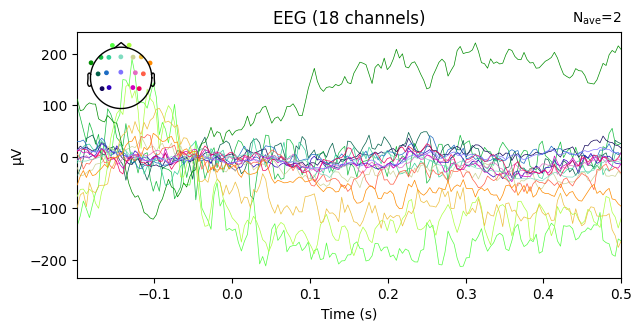

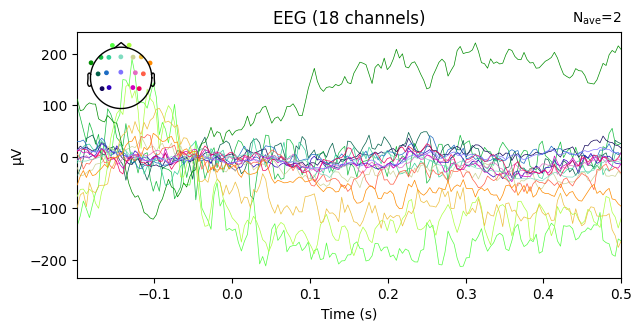

In [53]:
from mne import read_events, Epochs

# Load events and create epochs
# events = read_events('your_events_file.eve')
epochs = Epochs(raw, events, event_id=1, tmin=-0.2, tmax=0.5, baseline=(None, 0), preload=True)

# Plot average evoked potential
evoked = epochs.average()
evoked.plot()


In [55]:
from datetime import datetime, timezone

from pytz import utc

new_date = datetime(2022,1,1, 0,0, tzinfo=timezone.utc)

In [56]:
raw.set_meas_date(new_date)

<RawEDF | chb01_01.edf, 18 x 921600 (3600.0 s), ~126.6 MB, data loaded>

In [57]:
type(raw)

mne.io.edf.edf.RawEDF

In [58]:
#ch_mappingt_channel_types({'EEG Fz': 'eeg', 'MISC E': 'misc'})
raw.save('output_ieeg.fif', overwrite=True)
raw

Overwriting existing file.
Writing /home/weasel/reps/ai-seizure-detectives/output_ieeg.fif
Closing /home/weasel/reps/ai-seizure-detectives/output_ieeg.fif
[done]


<RawEDF | chb01_01.edf, 18 x 921600 (3600.0 s), ~126.6 MB, data loaded>

### Some Calculations

In [60]:
raw.compute_psd(method="multitaper", tmin=10, tmax=20, fmin=5, fmax=30, picks="eeg")

    Using multitaper spectrum estimation with 7 DPSS windows


Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Raw
Dims,"channel, freq"
Estimation method,multitaper
Number of channels,18
Number of frequency bins,250
Frequency range,5.10 – 29.99 Hz


    Using multitaper spectrum estimation with 7 DPSS windows


/home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


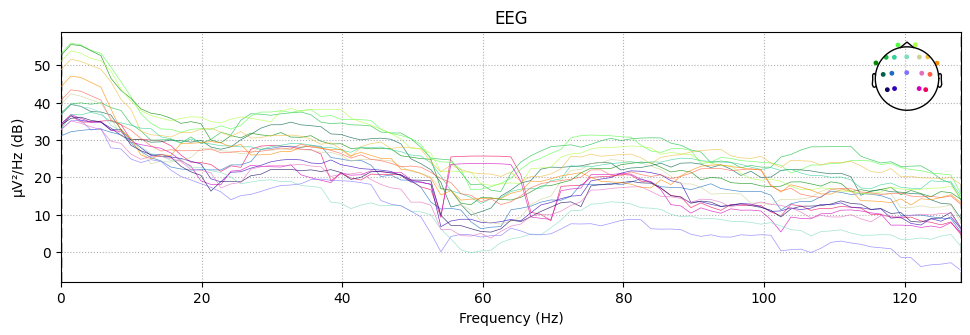

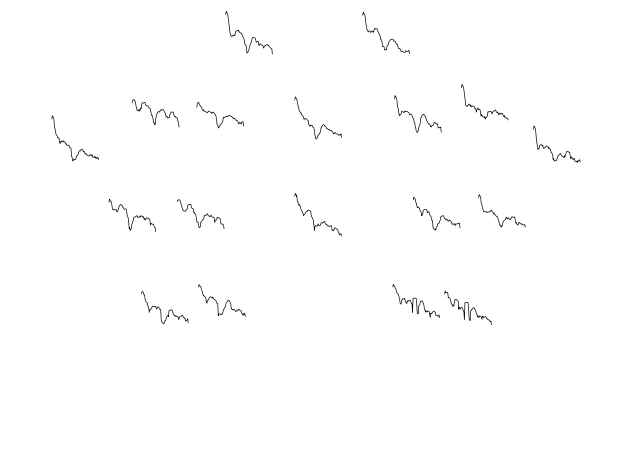

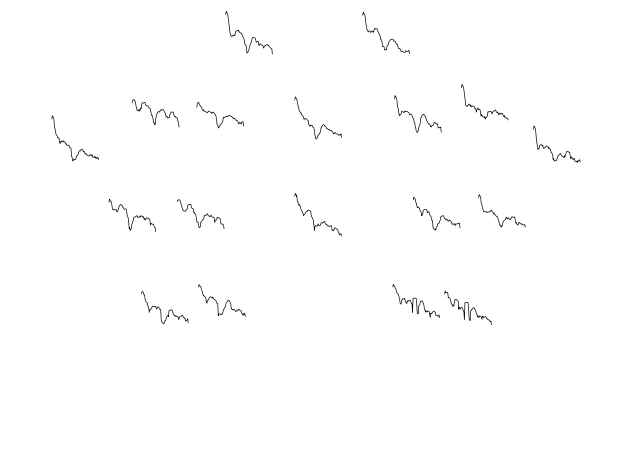

In [62]:
evk_spectrum = evoked.compute_psd()
evk_spectrum.plot(picks="data", exclude="bads")
evk_spectrum.plot_topo(color="k", fig_facecolor="w", axis_facecolor="w")

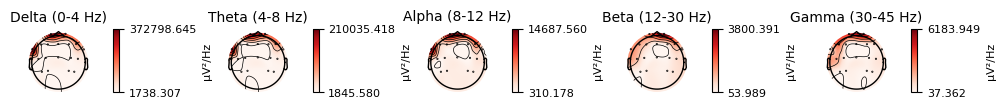

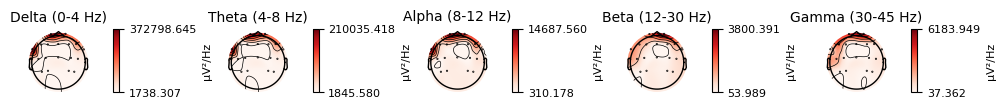

In [64]:
evk_spectrum.plot_topomap(ch_type="eeg", agg_fun=np.median)

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


/home/weasel/reps/ai-seizure-detectives/.venv/lib/python3.11/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


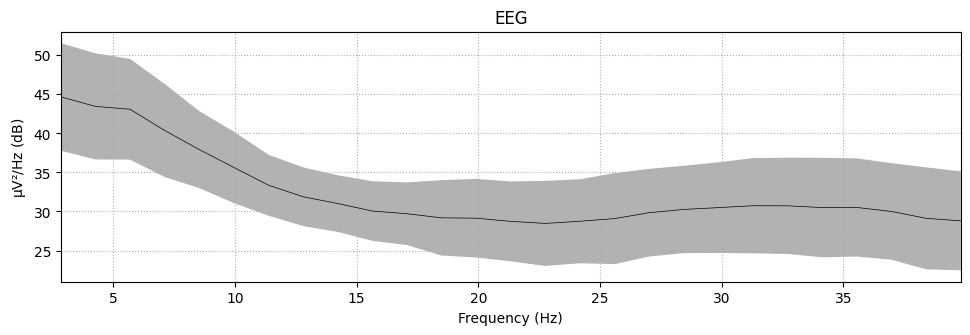

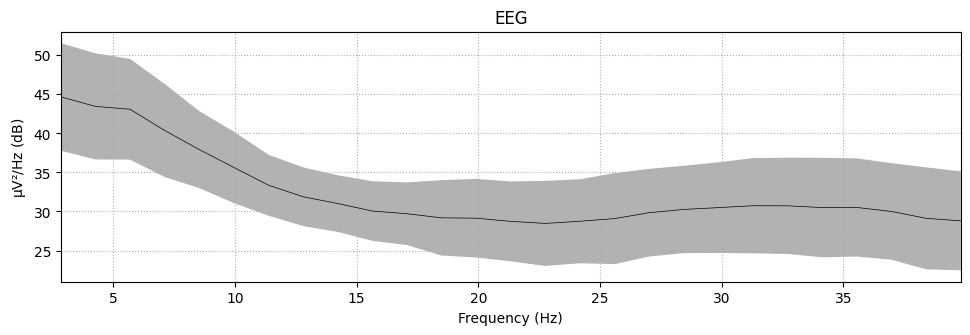

In [65]:
epochs.compute_psd(fmin=2.0, fmax=40.0).plot(average=True, picks="data", exclude="bads")

In [66]:
epochs.compute_psd().plot_topomap(ch_type="grad", normalize=False, contours=0)

    Using multitaper spectrum estimation with 7 DPSS windows


ValueError: No channels of type 'grad'